In [1]:
import configparser
import mysql.connector
import os
import pandas as pd
import seaborn as sns


In [2]:
def connect_to_sql_db(host_name, user_name, user_password, db):
    dbconnection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        database = db
    )
    print("Connection to MySQL DB successful")

    cursorx = dbconnection.cursor()

    return dbconnection, cursorx

def retrieve_data(query):
    cursor.execute(query)

    # Fetch column names
    column_names = [column[0] for column in cursor.description]

    # Fetch data rows
    rows = cursor.fetchall()

    # Create a Pandas DataFrame with column names and data
    data_frame = pd.DataFrame(rows, columns=column_names)

    return data_frame


# SQL Database connection

In [4]:
os.chdir('../')
# Import settings
config = configparser.ConfigParser()
config.read(r"config\config.ini", encoding='utf-8')

host = config.get('SQL DB', 'host_name')
user = config.get('SQL DB', 'user')
passwd = config.get('SQL DB', 'passwd')
database = config.get('SQL DB', 'database')

# Connect to database
cnx, cursor = connect_to_sql_db(host, user, passwd, database)


Connection to MySQL DB successful


# Exploratory Data Analysis

## Flight price depending on days till flight

In [6]:
#Data import query
price_days_till_flight_query = "SELECT " \
                    "time_till_departure AS 'Time till departure'," \
                    " AVG(price) AS 'Price' " \
                    "FROM prices " \
                    "GROUP BY time_till_departure, WEEKDAY(departure_datetime) " \
                    "ORDER BY time_till_departure;"

price_days_till_flight = retrieve_data(price_days_till_flight_query)

<Axes: xlabel='Time till departure', ylabel='Price'>

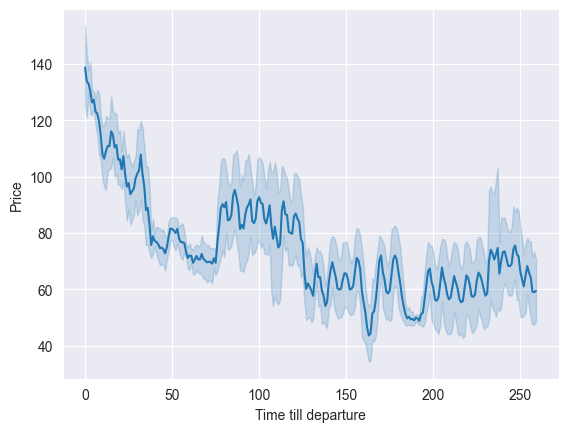

In [7]:
sns.lineplot(data = price_days_till_flight, x = "Time till departure", y = 'Price')

## Price evolution depending on days till departure grouped by weekday of the flight departure


In [8]:
#Data import query
price_days_till_flight_by_weekday_query = "SELECT " \
                    "   time_till_departure AS 'Time till departure'," \
                    "   AVG(price) AS 'Price'," \
                    "   CASE WEEKDAY(MIN(departure_datetime)) " \
                    "       WHEN 0 THEN 'Monday' " \
                    "       WHEN 1 THEN 'Tuesday' " \
                    "       WHEN 2 THEN 'Wednesday' " \
                    "       WHEN 3 THEN 'Thursday' " \
                    "       WHEN 4 THEN 'Friday' " \
                    "       WHEN 5 THEN 'Saturday' " \
                    "       WHEN 6 THEN 'Sunday' " \
                    "   END AS 'Day of the week' " \
                    "FROM prices " \
                    "GROUP BY time_till_departure, WEEKDAY(departure_datetime) " \
                    "ORDER BY time_till_departure ASC;"

price_days_till_flight_by_weekday = retrieve_data(price_days_till_flight_by_weekday_query)

<Axes: xlabel='Time till departure', ylabel='Price'>

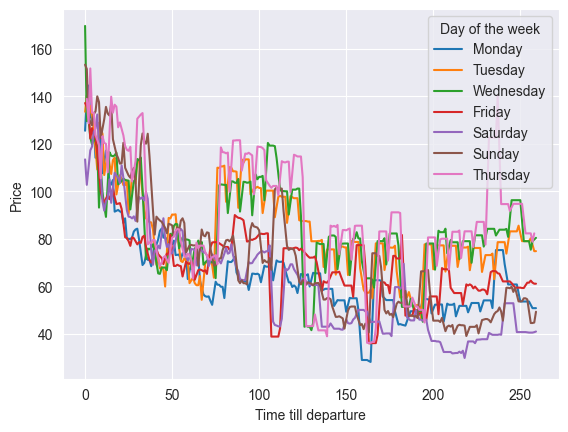

In [9]:
# Plot the data
sns.lineplot(data = price_days_till_flight_by_weekday, x = "Time till departure", y = 'Price', hue = "Day of the week")

## Price evolution depending on days till departure grouped by route

In [10]:
price_days_till_flight_per_route_query = 'SELECT\n    time_till_departure as \'Time till departure\',\n    AVG(price) as \'Price\',\n    CONCAT(departure_airport_iata, \'-\', destination_airport_iata) AS \'Route\'\nFROM prices\nGROUP BY time_till_departure, route;\n'
price_days_till_flight_per_route = retrieve_data(price_days_till_flight_per_route_query)

<Axes: xlabel='Time till departure', ylabel='Price'>

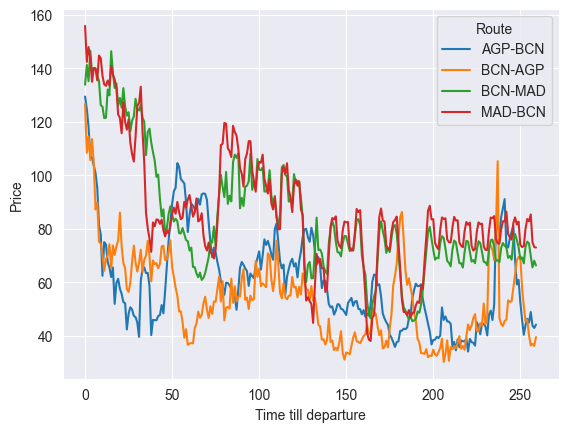

In [11]:
# Plot the data
sns.lineplot(data = price_days_till_flight_per_route, x = "Time till departure", y = 'Price', hue = "Route")

In [12]:
price_days_till_flight_per_flightn_query = "SELECT time_till_departure as 'Time till departure', flight_number as 'Flight number', AVG(price) as 'Price' FROM prices WHERE destination_airport_iata = 'BCN' AND departure_airport_iata = 'AGP' GROUP BY time_till_departure, flight_number;"
price_days_till_flight_per_flightn = retrieve_data(price_days_till_flight_per_flightn_query)

<Axes: xlabel='Time till departure', ylabel='Price'>

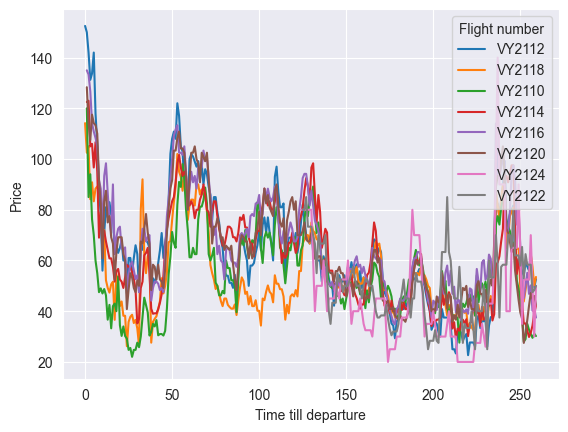

In [13]:
sns.lineplot(price_days_till_flight_per_flightn, x = 'Time till departure', y = 'Price', hue = 'Flight number')